In [599]:
import torch
print(torch.__version__)

2.0.1


# **Loading the Dataset**

In [600]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


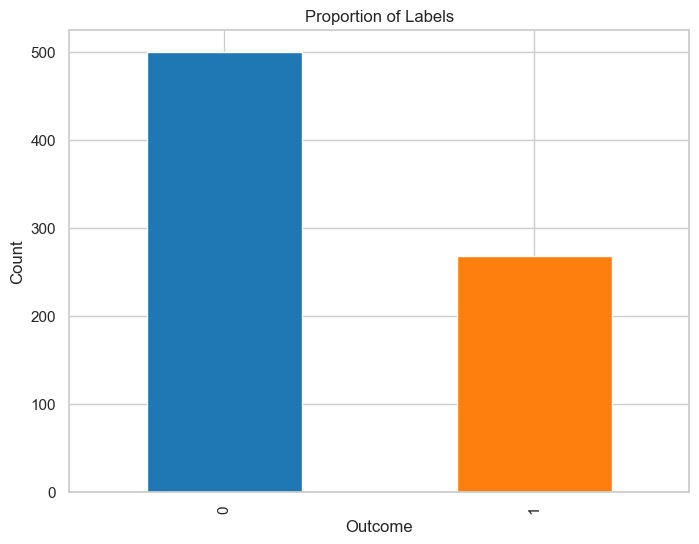

0    500
1    268
Name: Outcome, dtype: int64

In [601]:
features = df.drop(["Outcome"], axis = 1)
labels= df["Outcome"].copy()

import matplotlib.pyplot as plt
label_counts = labels.value_counts()
colors = ['#1f77b4', '#ff7f0e']  
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color=colors)
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Proportion of Labels')
plt.xticks(ticks=[0, 1], labels=['0', '1'])  
plt.show()
label_counts 

In [602]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# **Data Preprocessing**

## **Handling Duplicates and Missing Values**

In [603]:
duplicate = df[df.duplicated()]
print("Duplicate Rows :",duplicate)

Duplicate Rows : Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


In [604]:
print((df == 0).sum())

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [605]:
df[['Pregnancies','Glucose','BloodPressure','SkinThickness',
      'Insulin','BMI']] = df[['Pregnancies','Glucose','BloodPressure','SkinThickness',
                                       'Insulin','BMI']].replace(0,np.NaN)

In [606]:
print((df == 0).sum())

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [607]:
#Creating a copy of data
df_copy = df.copy(deep=True)

In [608]:
for i in df_copy.columns[df_copy.isnull().any(axis=0)]:     
    df_copy[i] = df_copy.groupby(["Outcome"])[i].transform(lambda x: x.fillna(x.mean()))

## **Outlier Detection and Capping**

In [609]:
Q1  = pd.DataFrame()
Q3  =   pd.DataFrame()
IQR =  pd.DataFrame()
UpperLimit =  pd.DataFrame()
LowerLimit =  pd.DataFrame()
Outlier_UpperLimit =  pd.DataFrame(index=[1,2,3,4])
Outlier_LowerLimit =  pd.DataFrame(index=[1,2,3,4])

columns = df_copy.columns[0:-1]

for i in columns:
    Q1[i] = [df_copy[i].quantile(0.25)]
    Q3[i]=  [df_copy[i].quantile(0.75)]
    IQR[i] = [Q3[i][0]-Q1[i][0]]
    UpperLimit[i] = [Q3[i][0]+1.5*IQR[i][0]]
    LowerLimit[i] = [Q1[i][0]-1.5*IQR[i][0]]

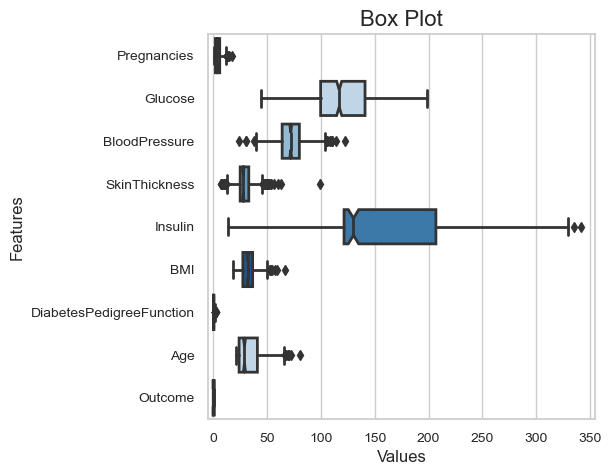

In [610]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a custom color palette
custom_palette = sns.color_palette("Blues")

# Create a box plot with custom settings
plt.figure(figsize=(5, 5))
sns.set(style="whitegrid")  # Use a white grid background
ax = sns.boxplot(data=df_copy, 
                 orient='h', 
                 palette=custom_palette,  # Use the custom color palette
                 notch=True,  # Show notches to display confidence intervals
                 linewidth=2,  # Increase line width
                 saturation=0.75)  # Adjust color saturation

# Customize the plot further if needed
plt.title("Box Plot", fontsize=16)
plt.xlabel("Values", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(-5, 355)  # Adjust the x-axis limits

# Show the plot
plt.show()

In [611]:
df1 = pd.concat([Q1,Q3,IQR,UpperLimit,LowerLimit])
df1.index = ["Q1","Q3","IQR","UpperLimit","LowerLimit"]
df2 = df1.T

In [612]:
columns = ["Insulin","SkinThickness","DiabetesPedigreeFunction","Pregnancies","BloodPressure","BMI","Age"]

def Cap_Outliers(df,column):
    for i in column:
        print('Working on column: {}'.format(i))
        df[i] = np.where(df[i]>df2["UpperLimit"][i],df2["UpperLimit"][i],
                            np.where(df[i]<df2["LowerLimit"][i],df2["LowerLimit"][i],df[i]))
    return df

Cap_Outliers(df_copy,columns)

Working on column: Insulin
Working on column: SkinThickness
Working on column: DiabetesPedigreeFunction
Working on column: Pregnancies
Working on column: BloodPressure
Working on column: BMI
Working on column: Age


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.0,206.846154,33.6,0.627,50.0,1
1,1.000000,85.0,66.0,29.0,130.287879,26.6,0.351,31.0,0
2,8.000000,183.0,64.0,33.0,206.846154,23.3,0.672,32.0,1
3,1.000000,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0
4,5.669565,137.0,40.0,35.0,168.000000,43.1,1.200,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,45.0,180.000000,32.9,0.171,63.0,0
764,2.000000,122.0,70.0,27.0,130.287879,36.8,0.340,27.0,0
765,5.000000,121.0,72.0,23.0,112.000000,26.2,0.245,30.0,0
766,1.000000,126.0,60.0,33.0,206.846154,30.1,0.349,47.0,1


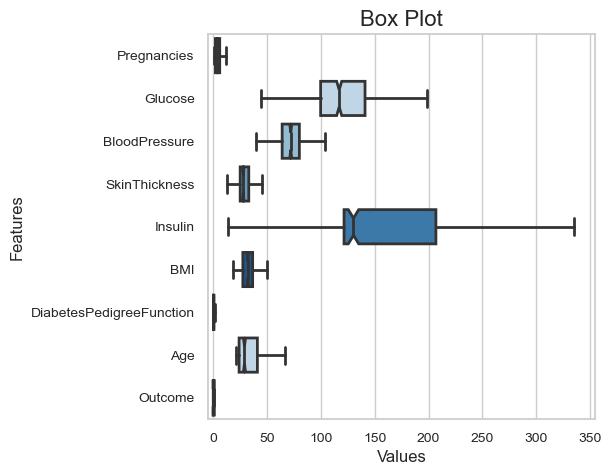

In [613]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a custom color palette
custom_palette = sns.color_palette("Blues")

# Create a box plot with custom settings
plt.figure(figsize=(5, 5))
sns.set(style="whitegrid")  # Use a white grid background
ax = sns.boxplot(data=df_copy, 
                 orient='h', 
                 palette=custom_palette,  # Use the custom color palette
                 notch=True,  # Show notches to display confidence intervals
                 linewidth=2,  # Increase line width
                 saturation=0.75)  # Adjust color saturation

# Customize the plot further if needed
plt.title("Box Plot", fontsize=16)
plt.xlabel("Values", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(-5, 355)  # Adjust the x-axis limits

# Show the plot
plt.show()

## **Data Spliting**

In [614]:
df_copy.shape

(768, 9)

In [615]:
X = df_copy.drop(columns=['Outcome']).values
y = df_copy['Outcome'].values

In [616]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, shuffle=True, stratify=y)

In [617]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=1, stratify=y_train)

In [618]:
print("Training size:", X_train.shape)
print("Validation size:", X_val.shape)
print("Test size:", X_test.shape)

Training size: (460, 8)
Validation size: (154, 8)
Test size: (154, 8)


In [619]:
from collections import Counter
print("Training labels:", Counter(y_train))
print("Validation labels:", Counter(y_val))
print("Test labels:", Counter(y_test))

Training labels: Counter({0: 300, 1: 160})
Validation labels: Counter({0: 100, 1: 54})
Test labels: Counter({0: 100, 1: 54})


## **Features Scaling**

In [620]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)
X = scaler.transform(X)

# **Building and Training the Model**

## **The Initial Model With SGD Optimizer**

In [621]:
# Check if CUDA (GPU) is available, and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [622]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score

seed = 1
torch.manual_seed(seed)
np.random.seed(seed)
# Set random seeds for reproducibility

# Step 2: Define the Perceptron model using PyTorch
class Perceptron(nn.Module):
    def __init__(self, input_size):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(input_size, 1)  # Output size is 1 for binary classification
    
    def forward(self, x):
        x = torch.sigmoid(self.fc(x))
        return x

# Step 3: Define the loss function and optimizer
input_size = X_train.shape[1]  # Number of input features
model = Perceptron(input_size)
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent

# Move the model and loss to the selected device
model = model.to(device)
criterion = criterion.to(device)

# Step 4: Train the model on the training data
num_epochs = 100
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    inputs = torch.tensor(X_train, dtype=torch.float32)
    labels = torch.tensor(y_train, dtype=torch.float32)
    # Inside your training loop, move inputs and labels to the device
    inputs, labels = inputs.to(device), labels.to(device)
    
    optimizer.zero_grad()
    outputs = model(inputs).squeeze()
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch: {epoch+1:03d}/{num_epochs:03d} | Train Loss: {train_losses[-1]:.2f} | Val Loss: {val_losses[-1]:.2f} | Train Acc: {train_accuracies[-1]*100:.2f}% | Val Acc: {val_accuracies[-1]*100:.2f}%")

    # Calculate training accuracy for this epoch
    train_predictions = (outputs >= 0.5).int().numpy()
    train_accuracy = accuracy_score(y_train, train_predictions)
    train_losses.append(loss.item())
    train_accuracies.append(train_accuracy)

    # Calculate validation accuracy for this epoch
    model.eval()
    with torch.no_grad():
        val_inputs = torch.tensor(X_val, dtype=torch.float32)
        val_labels = torch.tensor(y_val, dtype=torch.float32)
        val_outputs = model(val_inputs).squeeze()
        val_loss = criterion(val_outputs, val_labels)
        val_predictions = (val_outputs >= 0.5).int().numpy()
        val_accuracy = accuracy_score(y_val, val_predictions)
        val_losses.append(val_loss.item())
        val_accuracies.append(val_accuracy)

# Step 5: Evaluate the model on the test data
model.eval()
with torch.no_grad():
    test_inputs = torch.tensor(X_test, dtype=torch.float32)
    test_labels = torch.tensor(y_test, dtype=torch.float32)
    test_outputs = model(test_inputs).squeeze()
    test_predictions = (test_outputs >= 0.5).int().numpy()

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, test_predictions)

# Calculate the final training and validation accuracy
final_train_accuracy = train_accuracies[-1]
final_val_accuracy = val_accuracies[-1]

print(f'Training Accuracy: {final_train_accuracy * 100:.2f}%')
print(f'Validation Accuracy: {final_val_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Epoch: 010/100 | Train Loss: 0.74 | Val Loss: 0.75 | Train Acc: 48.26% | Val Acc: 49.35%
Epoch: 020/100 | Train Loss: 0.72 | Val Loss: 0.73 | Train Acc: 52.83% | Val Acc: 51.30%
Epoch: 030/100 | Train Loss: 0.69 | Val Loss: 0.71 | Train Acc: 57.61% | Val Acc: 53.25%
Epoch: 040/100 | Train Loss: 0.68 | Val Loss: 0.70 | Train Acc: 59.35% | Val Acc: 54.55%
Epoch: 050/100 | Train Loss: 0.66 | Val Loss: 0.68 | Train Acc: 61.30% | Val Acc: 55.84%
Epoch: 060/100 | Train Loss: 0.64 | Val Loss: 0.67 | Train Acc: 64.13% | Val Acc: 55.19%
Epoch: 070/100 | Train Loss: 0.63 | Val Loss: 0.66 | Train Acc: 66.30% | Val Acc: 59.09%
Epoch: 080/100 | Train Loss: 0.61 | Val Loss: 0.65 | Train Acc: 67.17% | Val Acc: 62.99%
Epoch: 090/100 | Train Loss: 0.60 | Val Loss: 0.64 | Train Acc: 68.26% | Val Acc: 62.99%
Epoch: 100/100 | Train Loss: 0.59 | Val Loss: 0.63 | Train Acc: 69.78% | Val Acc: 64.29%
Training Accuracy: 69.78%
Validation Accuracy: 64.29%
Test Accuracy: 68.83%


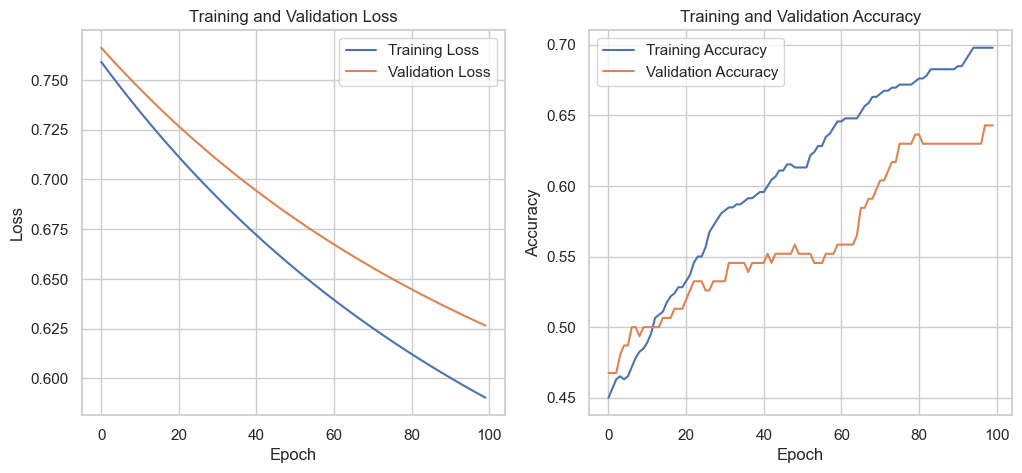

In [623]:
# Step 6: Plot the learning curve (training and validation loss)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(num_epochs), train_losses, label='Training Loss')
plt.plot(range(num_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(range(num_epochs), train_accuracies, label='Training Accuracy')
plt.plot(range(num_epochs), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()

## **The Model after changing to Adam Optimizer**

In [624]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score

seed = 1
torch.manual_seed(seed)
np.random.seed(seed)
# Set random seeds for reproducibility

# Step 2: Define the Perceptron model using PyTorch
class Perceptron(nn.Module):
    def __init__(self, input_size):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(input_size, 1)  # Output size is 1 for binary classification

    def forward(self, x):
        x = torch.sigmoid(self.fc(x))
        return x

# Step 3: Define the loss function and optimizer
input_size = X_train.shape[1]  # Number of input features
model = Perceptron(input_size)
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adjust weight_decay as needed

# Move the model and loss to the selected device
model = model.to(device)
criterion = criterion.to(device)

# Step 4: Train the model on the training data
num_epochs = 100
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    inputs = torch.tensor(X_train, dtype=torch.float32)
    labels = torch.tensor(y_train, dtype=torch.float32)
    # Inside your training loop, move inputs and labels to the device
    inputs, labels = inputs.to(device), labels.to(device)
    
    optimizer.zero_grad()
    outputs = model(inputs).squeeze()
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch: {epoch+1:03d}/{num_epochs:03d} | Train Loss: {train_losses[-1]:.2f} | Val Loss: {val_losses[-1]:.2f} | Train Acc: {train_accuracies[-1]*100:.2f}% | Val Acc: {val_accuracies[-1]*100:.2f}%")

    # Calculate training accuracy for this epoch
    train_predictions = (outputs >= 0.5).int().numpy()
    train_accuracy = accuracy_score(y_train, train_predictions)
    train_losses.append(loss.item())
    train_accuracies.append(train_accuracy)

    # Calculate validation accuracy for this epoch
    model.eval()
    with torch.no_grad():
        val_inputs = torch.tensor(X_val, dtype=torch.float32)
        val_labels = torch.tensor(y_val, dtype=torch.float32)
        val_outputs = model(val_inputs).squeeze()
        val_loss = criterion(val_outputs, val_labels)
        val_predictions = (val_outputs >= 0.5).int().numpy()
        val_accuracy = accuracy_score(y_val, val_predictions)
        val_losses.append(val_loss.item())
        val_accuracies.append(val_accuracy)

# Step 5: Evaluate the model on the test data
model.eval()
with torch.no_grad():
    test_inputs = torch.tensor(X_test, dtype=torch.float32)
    test_labels = torch.tensor(y_test, dtype=torch.float32)
    test_outputs = model(test_inputs).squeeze()
    test_predictions = (test_outputs >= 0.5).int().numpy()

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, test_predictions)

# Calculate the final training and validation accuracy
final_train_accuracy = train_accuracies[-1]
final_val_accuracy = val_accuracies[-1]

print(f'Training Accuracy: {final_train_accuracy * 100:.2f}%')
print(f'Validation Accuracy: {final_val_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Epoch: 010/100 | Train Loss: 0.67 | Val Loss: 0.69 | Train Acc: 60.00% | Val Acc: 56.49%
Epoch: 020/100 | Train Loss: 0.60 | Val Loss: 0.63 | Train Acc: 67.39% | Val Acc: 64.29%
Epoch: 030/100 | Train Loss: 0.55 | Val Loss: 0.59 | Train Acc: 70.43% | Val Acc: 66.88%
Epoch: 040/100 | Train Loss: 0.52 | Val Loss: 0.56 | Train Acc: 73.48% | Val Acc: 68.83%
Epoch: 050/100 | Train Loss: 0.49 | Val Loss: 0.53 | Train Acc: 76.30% | Val Acc: 72.08%
Epoch: 060/100 | Train Loss: 0.47 | Val Loss: 0.51 | Train Acc: 78.48% | Val Acc: 75.97%
Epoch: 070/100 | Train Loss: 0.45 | Val Loss: 0.49 | Train Acc: 79.57% | Val Acc: 75.32%
Epoch: 080/100 | Train Loss: 0.44 | Val Loss: 0.48 | Train Acc: 80.65% | Val Acc: 74.68%
Epoch: 090/100 | Train Loss: 0.43 | Val Loss: 0.48 | Train Acc: 81.30% | Val Acc: 75.32%
Epoch: 100/100 | Train Loss: 0.42 | Val Loss: 0.47 | Train Acc: 81.96% | Val Acc: 75.97%
Training Accuracy: 82.17%
Validation Accuracy: 75.97%
Test Accuracy: 78.57%


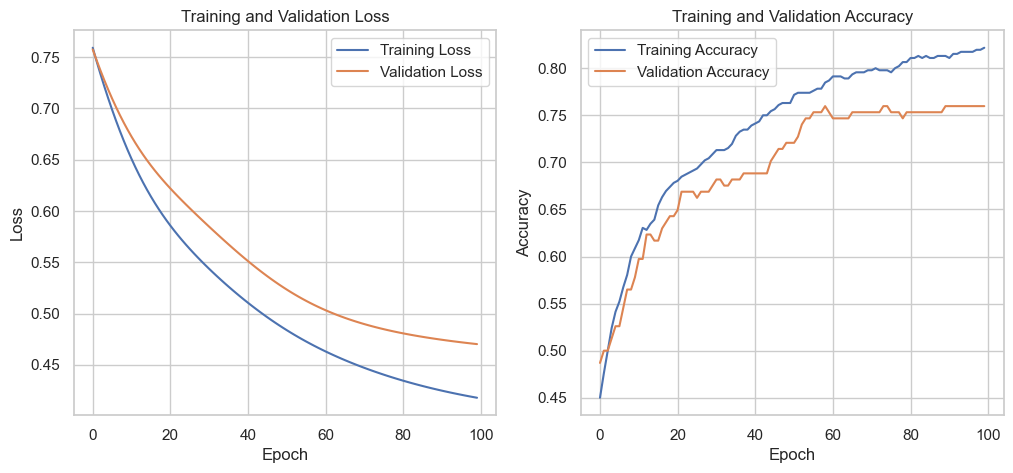

In [625]:
# Step 6: Plot the learning curve (training and validation loss)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(num_epochs), train_losses, label='Training Loss')
plt.plot(range(num_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(range(num_epochs), train_accuracies, label='Training Accuracy')
plt.plot(range(num_epochs), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()

## **The Model after adding Kaiming Initialization**

In [626]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score

seed = 1
torch.manual_seed(seed)
np.random.seed(seed)
# Set random seeds for reproducibility

# Step 2: Define the Perceptron model using PyTorch
class Perceptron(nn.Module):
    def __init__(self, input_size):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(input_size, 1)  # Output size is 1 for binary classification
        nn.init.kaiming_normal_(self.fc.weight)

    def forward(self, x):
        x = torch.sigmoid(self.fc(x))
        return x

# Step 3: Define the loss function and optimizer
input_size = X_train.shape[1]  # Number of input features
model = Perceptron(input_size)
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adjust weight_decay as needed

# Move the model and loss to the selected device
model = model.to(device)
criterion = criterion.to(device)

# Step 4: Train the model on the training data
num_epochs = 100
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    inputs = torch.tensor(X_train, dtype=torch.float32)
    labels = torch.tensor(y_train, dtype=torch.float32)
    # Inside your training loop, move inputs and labels to the device
    inputs, labels = inputs.to(device), labels.to(device)
    
    optimizer.zero_grad()
    outputs = model(inputs).squeeze()
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch: {epoch+1:03d}/{num_epochs:03d} | Train Loss: {train_losses[-1]:.2f} | Val Loss: {val_losses[-1]:.2f} | Train Acc: {train_accuracies[-1]*100:.2f}% | Val Acc: {val_accuracies[-1]*100:.2f}%")

    # Calculate training accuracy for this epoch
    train_predictions = (outputs >= 0.5).int().numpy()
    train_accuracy = accuracy_score(y_train, train_predictions)
    train_losses.append(loss.item())
    train_accuracies.append(train_accuracy)

    # Calculate validation accuracy for this epoch
    model.eval()
    with torch.no_grad():
        val_inputs = torch.tensor(X_val, dtype=torch.float32)
        val_labels = torch.tensor(y_val, dtype=torch.float32)
        val_outputs = model(val_inputs).squeeze()
        val_loss = criterion(val_outputs, val_labels)
        val_predictions = (val_outputs >= 0.5).int().numpy()
        val_accuracy = accuracy_score(y_val, val_predictions)
        val_losses.append(val_loss.item())
        val_accuracies.append(val_accuracy)

# Step 5: Evaluate the model on the test data
model.eval()
with torch.no_grad():
    test_inputs = torch.tensor(X_test, dtype=torch.float32)
    test_labels = torch.tensor(y_test, dtype=torch.float32)
    test_outputs = model(test_inputs).squeeze()
    test_predictions = (test_outputs >= 0.5).int().numpy()

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, test_predictions)

# Calculate the final training and validation accuracy
final_train_accuracy = train_accuracies[-1]
final_val_accuracy = val_accuracies[-1]

print(f'Training Accuracy: {final_train_accuracy * 100:.2f}%')
print(f'Validation Accuracy: {final_val_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Epoch: 010/100 | Train Loss: 0.73 | Val Loss: 0.70 | Train Acc: 54.35% | Val Acc: 57.14%
Epoch: 020/100 | Train Loss: 0.61 | Val Loss: 0.60 | Train Acc: 69.57% | Val Acc: 69.48%
Epoch: 030/100 | Train Loss: 0.53 | Val Loss: 0.54 | Train Acc: 78.48% | Val Acc: 76.62%
Epoch: 040/100 | Train Loss: 0.49 | Val Loss: 0.50 | Train Acc: 81.09% | Val Acc: 79.22%
Epoch: 050/100 | Train Loss: 0.46 | Val Loss: 0.48 | Train Acc: 83.70% | Val Acc: 80.52%
Epoch: 060/100 | Train Loss: 0.44 | Val Loss: 0.47 | Train Acc: 83.91% | Val Acc: 81.82%
Epoch: 070/100 | Train Loss: 0.43 | Val Loss: 0.46 | Train Acc: 84.13% | Val Acc: 79.87%
Epoch: 080/100 | Train Loss: 0.42 | Val Loss: 0.46 | Train Acc: 84.57% | Val Acc: 80.52%
Epoch: 090/100 | Train Loss: 0.41 | Val Loss: 0.46 | Train Acc: 83.91% | Val Acc: 81.17%
Epoch: 100/100 | Train Loss: 0.41 | Val Loss: 0.45 | Train Acc: 83.70% | Val Acc: 80.52%
Training Accuracy: 83.70%
Validation Accuracy: 80.52%
Test Accuracy: 81.17%


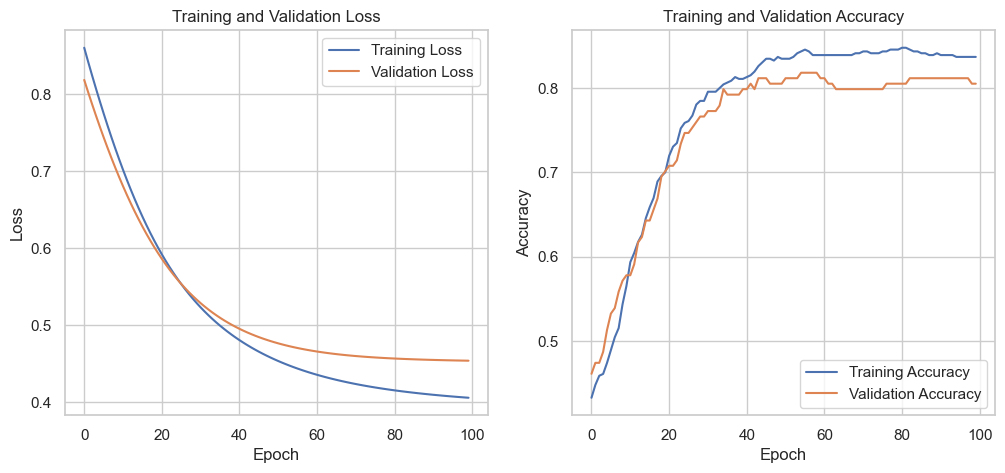

In [592]:
# Step 6: Plot the learning curve (training and validation loss)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(num_epochs), train_losses, label='Training Loss')
plt.plot(range(num_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(range(num_epochs), train_accuracies, label='Training Accuracy')
plt.plot(range(num_epochs), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()